In [1]:
import torch
from snn_delays.snn import SNN
from snn_delays.snn_binary import BinarySNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.model_loader import ModelLoader
from snn_delays.utils.train_utils import train, get_device, propagate_batch
from snn_delays.utils.visualization_utils import plot_raster
from snn_delays.utils.test_behavior import tb_save_max_last_acc
import matplotlib.pyplot as plt

device = get_device()

# For reproducibility
torch.manual_seed(10)

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


In [2]:
### DATASET

# Parameters
dataset = 'stmnist'
total_time = 50
batch_size = 1024

# Resized dataloader
# DATASET
DL = DatasetLoader(dataset=dataset,
                   caching='memory',
                   num_workers=0,
                   batch_size=batch_size,
                   total_time=total_time)

train_loader, test_loader, dataset_dict = DL.get_dataloaders()

[ToFrame(sensor_size=(10, 10, 2), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]


(50, 2, 10, 10)
(10, 10)


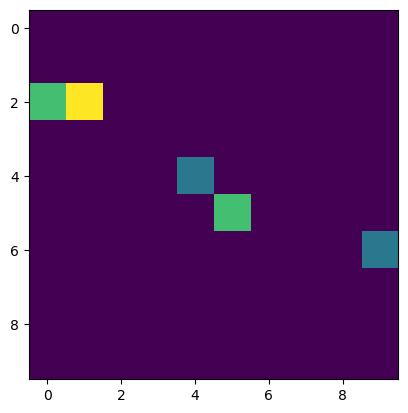

In [3]:
sample, label = DL._dataset.train_dataset.__getitem__(3)
print(sample.shape)
print(sample[0][0].shape)
plt.imshow(sample[0][0])

In [12]:
### SPIKING NEURAL NETWORK
#structure = (64, 1) # model 1 68%
#structure = (32, 2) # model 2 49%
structure = (64, 1) # model 3 49%

dataset_dict["time_ms"] = 2e3

loss_fn='spk_count'
#loss_fn = 'mem_sum'

snn = SNN(dataset_dict=dataset_dict, structure=structure, connection_type='f',
          delay=None, delay_type='', tau_m='normal',
          reset_to_zero=True, win=total_time,
          loss_fn=loss_fn, batch_size=batch_size, device=device,
          debug=True)
snn.input2spike_th = None

snn.to(device)

snn.model_name = 'full_weights_' + snn.model_name

num_epochs = 100
lr = 1e-3
ckpt_dir = 'exp_snn2chip'

train(snn, train_loader, test_loader, lr, num_epochs, dropout=0.0, 
    test_behavior=tb_save_max_last_acc, ckpt_dir=ckpt_dir, scheduler=(10, 0.95), test_every=1, freeze_taus=True)


[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
2000.0
Delta t: 40.0 ms
mean of normal: -1.8545865421311407
training full_weights_stmnist50_SNN_l1_1d1.t7 for 100 epochs...
Epoch [1/100], learning_rates 0.001000, 0.100000


Step [1/5], Loss: 0.11789
l1_score: 0
Step [2/5], Loss: 0.11007
l1_score: 0
Step [3/5], Loss: 0.10502
l1_score: 0
Step [4/5], Loss: 0.10094
l1_score: 0
Step [5/5], Loss: 0.09673
l1_score: 0
Step [6/5], Loss: 0.09440
l1_score: 0
Time elasped: 1.2819890975952148
Test Loss: 0.18806331604719162
Avg spk_count per neuron for all 50 time-steps 10.790389060974121
Avg spk per neuron per layer [10.79038893884892]
Test Accuracy of the model on the test samples: 10.863

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\exp_snn2chip
Gradient norm for 'f0_f1.weight': 0.0013
Gradient norm for 'f1_o.weight': 0.0125
saving max acc: 10.863309352517986
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\exp_snn2chip
Epoch [2/100], learning_rates 0.001000, 0.100000
Step [1/5], Loss: 0.09471
l1_score: 0
Step [2/5], Loss: 0.09252
l1_score: 0
Step [3/5], Loss: 0.09241
l1_score: 0
Step [4/5], Loss: 0.09212
l1_score: 0
Step [5/5], Lo

In [13]:
#snn_full = ModelLoader('full_weights_stmnist50_SNN_l1_1d1.t7_6841726618705036_max_100epoch','exp_snn2chip', batch_size, device, True)
snn_full = ModelLoader('full_weights_stmnist50_SNN_l1_1d1.t7_7712230215827338_max_89epoch','exp_snn2chip', batch_size, device, True)
#snn_full = ModelLoader('full_weights_stmnist50_SNN_l1_1d1.t7_874820143884892_max_92epoch','exp_snn2chip', batch_size, device, True)


[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
2000.0
Delta t: 40.0 ms
mean of normal: -1.8545865421311407
Instance of <class 'snn_delays.snn.SNN'> loaded successfully


In [6]:
snn_full.model_name = 'full_weights_500_epochs'

num_epochs = 5
lr = 1e-3
ckpt_dir = 'exp_snn2chip'

train(snn_full, train_loader, test_loader, lr, 50, dropout=0.0, 
    test_behavior=tb_save_max_last_acc, ckpt_dir=ckpt_dir, scheduler=(100, 0.95), test_every=1, freeze_taus=True)

training full_weights_500_epochs for 50 epochs...
Epoch [1/50], learning_rates 0.001000, 0.100000
Step [1/5], Loss: 0.06336


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


l1_score: 0
Step [2/5], Loss: 0.06567
l1_score: 0
Step [3/5], Loss: 0.06550
l1_score: 0
Step [4/5], Loss: 0.06377
l1_score: 0
Step [5/5], Loss: 0.06526
l1_score: 0
Step [6/5], Loss: 0.06521
l1_score: 0
Time elasped: 261.9635307788849
Test Loss: 0.12817256152629852
Avg spk_count per neuron for all 50 time-steps 4.600753307342529
Avg spk per neuron per layer [4.600753147482014]
Test Accuracy of the model on the test samples: 67.986

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\exp_snn2chip
Gradient norm for 'f0_f1.weight': 0.0004
Gradient norm for 'f1_o.weight': 0.0015
Epoch [2/50], learning_rates 0.000950, 0.095000
Step [1/5], Loss: 0.06304
l1_score: 0
Step [2/5], Loss: 0.06528
l1_score: 0
Step [3/5], Loss: 0.06477
l1_score: 0
Step [4/5], Loss: 0.06441
l1_score: 0
Step [5/5], Loss: 0.06426
l1_score: 0
Step [6/5], Loss: 0.06649
l1_score: 0
Time elasped: 1.3824191093444824
Test Loss: 0.12859763205051422
Avg spk_count per neuron for all 50 time-

Transferring the pretrained weights to the BinarizedSNN

In [3]:
#snn_full = ModelLoader('full_weights_stmnist50_SNN_l1_1d1.t7_6841726618705036_max_100epoch','exp_snn2chip', batch_size, device, True)
snn_full = ModelLoader('full_weights_stmnist50_SNN_l1_1d1.t7_7712230215827338_max_89epoch','exp_snn2chip', batch_size, device, True)
#snn_full = ModelLoader('full_weights_stmnist50_SNN_l1_1d1.t7_874820143884892_max_92epoch','exp_snn2chip', batch_size, device, True)

snn_full.input2spike_th = None

# from snn_delays.utils.train_utils import copy_snn
# snn_full_copy = copy_snn(snn_full, batch_size)

### SPIKING NEURAL NETWORK
structure = snn_full.structure
dataset_dict["time_ms"] = 2e3
loss_fn = snn_full.loss_fn

snn = BinarySNN(dataset_dict=dataset_dict, structure=structure, connection_type='f',
          delay=None, delay_type='', tau_m='normal', binary=True,
          reset_to_zero=True, win=total_time,
          loss_fn=loss_fn, batch_size=batch_size, device=device,
          debug=True)
snn.input2spike_th = None



[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
2000.0
Delta t: 40.0 ms
mean of normal: -1.8545865421311407
Instance of <class 'snn_delays.snn.SNN'> loaded successfully

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
2000.0
Delta t: 40.0 ms
mean of normal: -1.8545865421311407


In [4]:
weight_taus = [(name, w) for name, w  in snn.named_parameters() if 's' not in name]

for (name_src, param_src), (name_dst, param_dst) in zip(snn_full.named_parameters(), weight_taus):
    assert name_src == name_dst, f"Parameter mismatch: {name_src} != {name_dst}"
    param_dst.data.copy_(param_src.data)

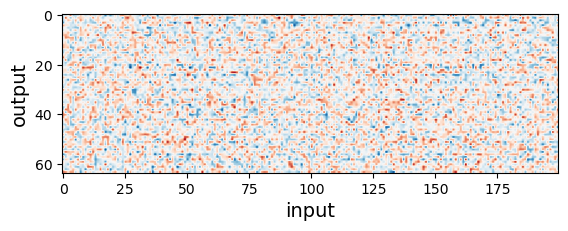

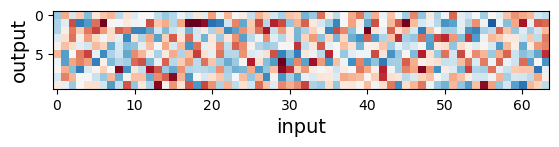

In [5]:
from snn_delays.utils.visualization_utils import plot_param, plot_distributions

w_params = [w for name, w  in snn.named_parameters() if 'f' in name]

for w in w_params:
    plot_param(w, '2D')
    plt.show()


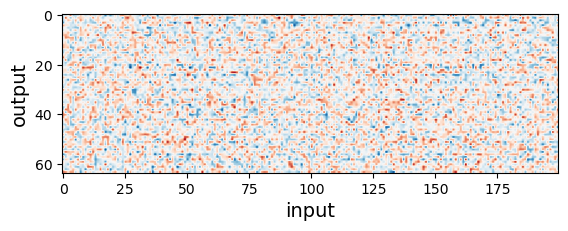

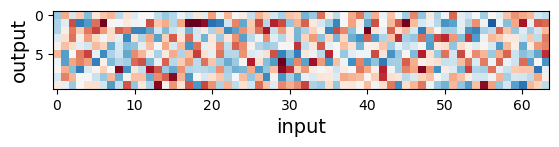

In [6]:
from snn_delays.utils.visualization_utils import plot_param, plot_distributions

w_params = [w for name, w  in snn_full.named_parameters() if 'f' in name]

for w in w_params:
    plot_param(w, '2D')
    plt.show()

In [7]:
# initial scores
a, b =snn_full.test(test_loader)
a, b =snn.test(test_loader)

Test Loss: 0.11934572830796242
Avg spk_count per neuron for all 50 time-steps 11.844480514526367
Avg spk per neuron per layer [11.844480665467627]
Test Accuracy of the model on the test samples: 73.453

Test Loss: 0.40006062388420105
Avg spk_count per neuron for all 50 time-steps 11.166558265686035
Avg spk per neuron per layer [11.166558003597123]
Test Accuracy of the model on the test samples: 17.338



In [ ]:
num_epochs = 100
lr = 1e-3
ckpt_dir = 'exp_snn2chip'

#snn.model_name = 'fine_tuned_unary_from_pretrained_spkcount' + snn.model_name
#snn.model_name = 'fine_tuned_unary_from_pretrained_memsum' + snn.model_name

#snn.model_name = 'fine_tuned_unaryhf_from_pretrained_spkcount' + snn.model_name
snn.model_name = 'fine_tuned_unaryhf_from_pretrained_memsum' + snn.model_name

#snn.model_name = 'fine_tuned_binary_from_pretrained_spkcount' + snn.model_name
#snn.model_name = 'fine_tuned_binary_from_pretrained_memsum' + snn.model_name

train(snn, train_loader, test_loader, lr, num_epochs, dropout=0.0, 
    test_behavior=tb_save_max_last_acc, ckpt_dir=ckpt_dir, scheduler=(100, 0.95), test_every=1, freeze_taus=True)

training fine_tuned_unaryhf_from_pretrained_spkcountstmnist50_BinarySNN_l1_1d1.t7 for 100 epochs...
Epoch [1/100], learning_rates 0.001000, 0.100000
Step [1/5], Loss: 0.20339


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


l1_score: 0
Step [2/5], Loss: 0.19868
l1_score: 0
Step [3/5], Loss: 0.19872
l1_score: 0
Step [4/5], Loss: 0.18753
l1_score: 0
Step [5/5], Loss: 0.18690
l1_score: 0
Step [6/5], Loss: 0.19016
l1_score: 0
Time elasped: 312.6477093696594
Test Loss: 0.36209213733673096
Avg spk_count per neuron for all 50 time-steps 9.939939498901367
Avg spk per neuron per layer [9.939939298561152]
Test Accuracy of the model on the test samples: 19.353

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\exp_snn2chip
Gradient norm for 'f0_f1.weight': 0.0086
Gradient norm for 'f1_o.weight': 0.0430
saving max acc: 19.35251798561151
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\exp_snn2chip
Epoch [2/100], learning_rates 0.001000, 0.100000
Step [1/5], Loss: 0.18688
l1_score: 0
Step [2/5], Loss: 0.17611
l1_score: 0
Step [3/5], Loss: 0.17736
l1_score: 0
Step [4/5], Loss: 0.17743
l1_score: 0
Step [5/5], Loss: 0.18601
l1_score: 0
Step 

Transfer the binarized weights back to a normal SNN 


[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
2000.0
Delta t: 40.0 ms
mean of normal: -1.8545865421311407


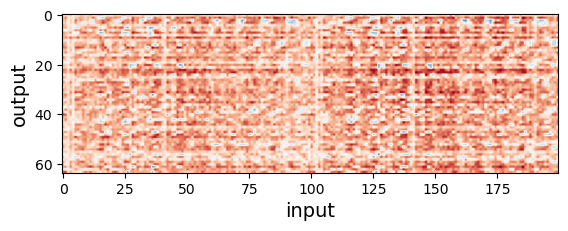

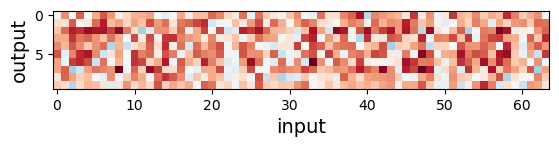

tensor(0.1766, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.2822, device='cuda:0', grad_fn=<MeanBackward0>)


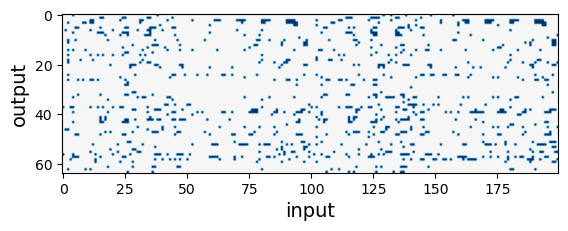

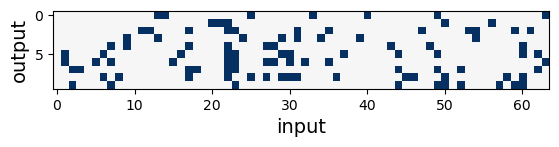

Test Loss: 0.16575603932142258
Avg spk_count per neuron for all 50 time-steps 5.893491268157959
Avg spk per neuron per layer [5.893491456834532]
Test Accuracy of the model on the test samples: 39.856

Test Loss: 0.16475362330675125
Avg spk_count per neuron for all 50 time-steps 5.893491268157959
Avg spk per neuron per layer [5.893491456834532]
Test Accuracy of the model on the test samples: 39.856



In [9]:
from snn_delays.utils.visualization_utils import plot_param, plot_distributions
from snn_delays.snn_binary import Binarize
from snn_delays.utils.train_utils import copy_snn

snn_bin = SNN(dataset_dict=dataset_dict, structure=structure, connection_type='f',
          delay=None, delay_type='', tau_m='normal',
          reset_to_zero=True, win=total_time,
          loss_fn=loss_fn, batch_size=batch_size, device=device,
          debug=True)

snn_bin.input2spike_th = None

for (name_src, param_src), (name_dst, param_dst) in zip(snn.named_parameters(), snn_bin.named_parameters()):
    assert name_src == name_dst, f"Parameter mismatch: {name_src} != {name_dst}"
    param_dst.data.copy_(param_src.data)

w_params = [w for name, w  in snn_bin.named_parameters() if 'f' in name]
for w in w_params:
    plot_param(w, '2D')
    plt.show()

### binarization operation
for w in w_params:
    scale = w.abs().mean()
    print(scale)
    #w.data = (w.data > 0.0).float().mul(scale)
    #w.data = w.data.sign().mul(scale)
    w.data = (w.data > 0.0).float().mul(scale*0.3)

for w in w_params:
    plot_param(w, '2D')
    plt.show()

# initial scores
a, b = snn.test(test_loader)
a, b = snn_bin.test(test_loader)

[0, 1]


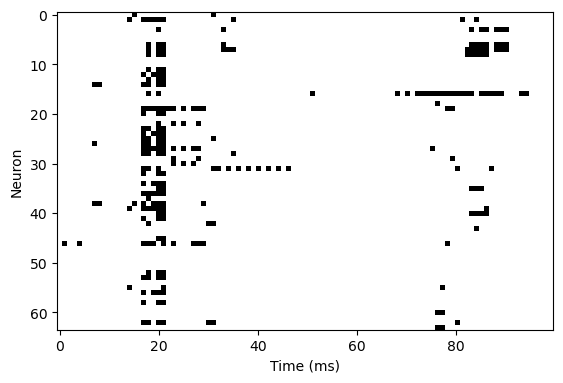

[0, 1]


<Axes: xlabel='Time (ms)', ylabel='Neuron'>

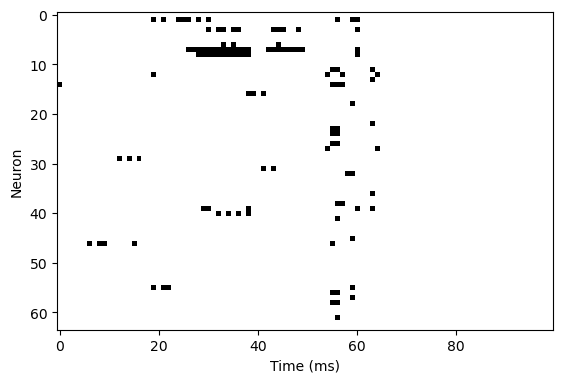

In [36]:
from snn_delays.utils.visualization_utils import plot_raster
plot_raster(snn, 'f1', 2)
plt.show()
plot_raster(snn_bin, 'f1', 2)

In [37]:
snn_bin.f0_f1.weight

Parameter containing:
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1378, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1378,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0', requires_grad=True)

### Test different Binarize functions


[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
2000.0
Delta t: 40.0 ms
mean of normal: -1.8545865421311407


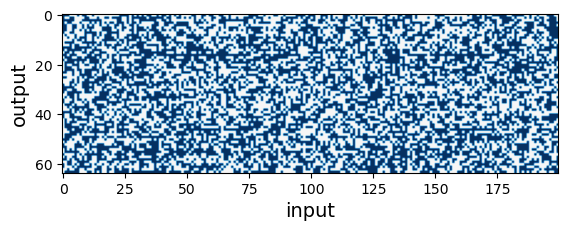

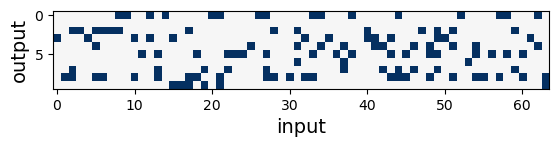

Parameter containing:
tensor([[0.2673, 0.2673, 0.2673,  ..., 0.2673, 0.0000, 0.0000],
        [0.2673, 0.0000, 0.0000,  ..., 0.2673, 0.2673, 0.0000],
        [0.2673, 0.2673, 0.2673,  ..., 0.2673, 0.2673, 0.0000],
        ...,
        [0.2673, 0.0000, 0.0000,  ..., 0.2673, 0.2673, 0.0000],
        [0.0000, 0.0000, 0.2673,  ..., 0.2673, 0.2673, 0.2673],
        [0.0000, 0.2673, 0.2673,  ..., 0.0000, 0.2673, 0.2673]],
       device='cuda:0', requires_grad=True)


In [ ]:
from torch.autograd import Function
# Custom Binarization Function (like the one you provided)
class Binarize(Function):
    @staticmethod
    def forward(ctx, input, quant_mode='det', allow_scale=True, inplace=False):
        ctx.inplace = inplace
        if ctx.inplace:
            ctx.mark_dirty(input)
            output = input
        else:
            output = input.clone()

        scale = output.abs().max() if allow_scale else 1

        if quant_mode == 'det':
            #return output.div(scale).sign().mul(scale) # {-1, 1}
            #return output.div(scale).clamp(0, 1).mul(scale) # {0, 1} (relu-like)
            return (output > 0.0).float().mul(scale) # {0, 1}
        else:
            return output.div(scale).add_(1).div_(2).add_(torch.rand(output.size()).add(-0.5)).clamp_(0,1).round().mul_(2).add_(-1).mul(scale)

    @staticmethod
    def backward(ctx, grad_output):
        # Straight-through Estimator (STE)
        grad_input = grad_output
        return grad_input, None, None, None
    
snn_bin = copy_snn(snn, batch_size)

w_params = [w for name, w  in snn_bin.named_parameters() if 'f' in name]

for w in w_params:
    w.data = Binarize.apply(w.data)

for w in w_params:
    plot_param(w, '2D')
    plt.show()

print(w_params[0])